# Assignment 2

In [1]:
import re
from textblob import TextBlob  
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np

# Importing Data File

In [2]:
df = pd.read_csv('C:\\Users\\Usman\\Desktop\\Assigment 2 Data Minig\\data.csv')

In [3]:
df = df.dropna()

In [4]:
test = list()
for x in df['text']:
    test.append(x)

# Data CLeaning

In [5]:
def tweet_clean(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# Clean Data Result

In [6]:
arr = []
for x in df:
    arr.append(tweet_clean(x))
arr[:10]

['user',
 'fullname',
 'tweet id',
 'timestamp',
 'url',
 'likes',
 'replies',
 'retweets',
 'text',
 'html']

# Applying Clustering

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [8]:
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt_vectorizer.fit(test)
print(cnt_vectorizer.vocabulary_)

{'palin': 5635, 'look': 4614, 'mom': 5071, 'getting': 3147, 'interviewed': 3843, 'katie': 4206, 'couric': 1934, 'going': 3216, 'disneyland': 2302, 'metoo': 4948, 'rt': 6508, 'jowyang': 4102, 'jimhirshfield': 4034, 'biden': 1161, 'white': 8256, 'house': 3579, 'funny': 3053, 'bracelet': 1340, 'bad': 1001, 'come': 1803, 'retort': 6375, 'powerful': 5928, 'comment': 1815, 'obama': 5458, 'continues': 1883, 'cause': 1571, 'discussion': 2296, 'http': 3597, 'phpurl': 5794, 'com': 1800, 'l4': 4373, 'don': 2357, 'lower': 4667, '48': 247, 'make': 4751, 'difference': 2264, 'american': 716, 'mccain': 4856, 've': 7995, 'got': 3247, 'wonder': 8329, 'll': 4588, 'happen': 3376, 'thursday': 7582, 'snowblower': 6958, 'xmpp': 8401, 'working': 8346, 'identi': 3676, 'ca': 1467, 'markusmerz': 4815, 'friends': 3028, 'wanted': 8153, 'identica': 3677, 'xing': 8398, 'wäre': 8390, 'toll': 7657, 'benutzbar': 1120, 'wenn': 8236, 'endlich': 2577, 'mal': 4759, 'der': 2200, 'messagetext': 4944, 'mail': 4743, 'benachric

In [9]:
vec1 = cnt_vectorizer.transform(test).toarray()
print(vec1.shape)

(1931, 8808)


In [10]:
vec1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
km = KMeans(n_clusters=2)

In [12]:
km.fit(vec1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
labels = km.labels_

In [14]:
labels

array([1, 0, 1, ..., 1, 1, 1])

Set A 302
Set B 1629


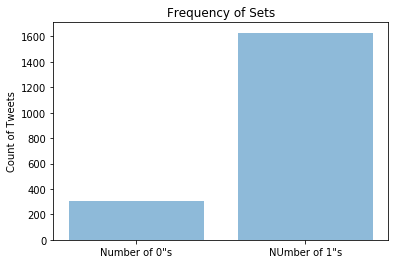

In [15]:
SetA = 0
SetB = 0
for x in labels:
    if x == 0:
        SetA = SetA + 1
    else:
        SetB = SetB + 1
        
print('Set A', SetA)
print('Set B', SetB)

objects = ('Number of 0"s', 'NUmber of 1"s')
y_pos = np.arange(len(objects))
performance = [SetA,SetB]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count of Tweets')
plt.title('Frequency of Sets')
 
plt.show()

# Using TextBlob 

In [36]:
public_tweets = df

# Sentiment Analysis

In [37]:
positive_tweets = []
negative_tweets = []
neutral_tweets  = []
sentiment = []
for tweet in public_tweets["text"]:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       sentiment.append('Positive')
       positive_tweets.append("text")
       print ('Positive')
    elif analysis.sentiment[0]<0:
       sentiment.append('Negative')
       negative_tweets.append("text")
       print ('Negative')
    else:
       sentiment.append('Neutral')
       neutral_tweets.append("text")
       print ('Neutral')

Palin: 'Look, Mom! After getting interviewed by Katie Couric, I'm going to Disneyland!' #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT via @jowyang @jimhirshfield: "Biden: "I can see the White House from my house" #metoo funny.
Sentiment(polarity=0.125, subjectivity=0.5)
Positive
@jimhirshfield: "Biden: "I can see the White House from my house" #metoo
funny.
Sentiment(polarity=0.125, subjectivity=0.5)
Positive
@jowyang the bracelet too, was a bad come back, the retort would have been more powerful without the bracelet comment. #metoo
Sentiment(polarity=0.025000000000000036, subjectivity=0.5416666666666666)
Positive
@jowyang Biden: "I can see the White House from my house" #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
The #Obama #metoo bracelet continues to cause discussion http://phpurl.com/l4
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
I don't have to be from the Lower 48 to make a difference. I'm an American too. #metoo
Sentiment(polarity=0.0, subjectivi

@KatCMcCormick ha Ok. Then good. #metoo
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Positive
“@BuzzFeed: Only In China: Balcony Drapes Made Of Moist Bacon http://bzfd.it/1eenDZM ”

"Frightened me out of my gourd!" #metoo
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
#metoo @NatalieMarthhpic.twitter.com/EaGCcIQmCe
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@elviramic @bellaacarp omg she still uses hashtag before saying something #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@JzeelaG #MeToo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@Carrie_Br4dshaw #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@its_marckel bahahahahahahahhaaahahahahahahahahahahahahahahahahahahahahaha...!! #again #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@robotwilson #metoo #sleepswiththefishes
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@SydneySue11 Great balls of fire!! #MeToo
Sentiment(polarity=1.0, subjectivity=0.75)
Positive
Hey @Flulaphilen G

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Coisas legais que preciso: Via @deABREU  "#metoo RT: @badjolo: Pra terminar meu TCC preciso de uma dessas: http://bit.ly/PfvoU"
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#metoo RT: @badjolo: Pra terminar meu TCC preciso de uma dessas: http://bit.ly/PfvoU
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
"58 Prozent finden das Internet zu kompliziert" http://tinyurl.com/qawhp2 #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @robertosoares: Boa noite.Vou tentar dormir mais cedo hoje. #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
The great MobileMe online backup experiment is in hiatus while you lot are hammering Apple’s servers for 10.5.7. #metoo
Sentiment(polarity=0.8, subjectivity=0.75)
Positive
역시 아이팟은 오타가 너무 잘난다..ㅠ (via @Aimellow) #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
como um conhecido disse, odeio seres humanos. (via @mari_abrantes) #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neu

Sentiment(polarity=0.4375, subjectivity=0.65)
Positive
@marndt51 #MeToo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#MeToo for diff reasons tho lol RT @yuyu2_: In all honesty I can't wait till this election is over
Sentiment(polarity=0.8, subjectivity=0.7)
Positive
Kamu tau gak, kenapa obat itu pahit? Karena manisnya ada sama kamu beby:* @AmhyeRahmi #metoo:*
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @PrudyChick: chicken running around sans head --> Me #metoo
Sentiment(polarity=-0.6, subjectivity=0.95)
Negative
@Sugarfooooot course not! #metoo #mademyday
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Oh. THAT'S what you people are doing when I see those squares. Apple shit. #metoo #soboom <3
Sentiment(polarity=0.4, subjectivity=0.9)
Positive
This must be the weekend for people to come home! #MeToo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@Greg1954 #busybusybee #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@PaulTrinel @marcsaunier @matteomartino @n

Neutral
What a coincidence! #metoo https://twitter.com/PAWSDetroit/status/773551829430984704 …
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#MeToo I just registered for #CES2017 Jan. 5-8, 2017 #LasVegas looking forward to @CardsCashReward stepping its #tech game up #PlanningAhead
Sentiment(polarity=-0.4, subjectivity=0.4)
Negative
@RudiSmitDance I am obsessed with you #metoo video omg I can't stop watching it ... I haven't danced in a while makes me restart
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
This choreography to @Meghan_Trainor's #MeToo by @RudiSmitDance is AMAZING! Video: http://bit.ly/2cddshV  pic.twitter.com/16FLZCftmf
Sentiment(polarity=0.7500000000000001, subjectivity=0.9)
Positive
#NowPlaying #MeghanTrainor - #MeToo on @Z108net!http://tunein.com/radio/Z108-s137763/ …
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@RudiSmitDance http://ln.is/ER8wD  WOW WOW WOW UNBELIEVABLE  slay my life! #MeToo #RudiSmit by @ermbates via @c0nvey
Sentiment(polarity=-0.00312

Sentiment(polarity=0.09166666666666666, subjectivity=0.5166666666666667)
Positive
Exactly. I've had doctors say things to me you wouldn't believe. The medical profession needs it's own #MeToo movement.
Sentiment(polarity=0.2833333333333333, subjectivity=0.4166666666666667)
Positive
Agents say #MeToo has changed how Hollywood negotiates sex scenes, but actresses remain vulnerable to abuse:
http://bit.ly/2o6vDuh pic.twitter.com/C2oToMaZlV
Sentiment(polarity=-0.5, subjectivity=0.5)
Negative
RT @Amazng99 THE BEST-KEPT SECRET IS THE ONE EVERYBODY KNOWS BUT NOBODY TALKS ABOUT.  Read the blog by bestselling author Bruce Rubenstein and get a FREE short story about you-know-what. http://smarturl.it/BRBvul  pic.twitter.com/D5ZnqeMrnb #metoo
Sentiment(polarity=0.0, subjectivity=0.6)
Neutral
Asia Argento: de pionera del #MeToo a acusada de abuso sexual http://ow.ly/l2OS30lyS4M pic.twitter.com/ih2It0vHKt
Sentiment(polarity=0.5, subjectivity=0.8333333333333334)
Positive
Misogyny and the Men Who Love

Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
Meghan_charts Dear Future Husband y Better uwu
#kCAFAVMUSICVIDEO #mETOO
Sentiment(polarity=0.25, subjectivity=0.3125)
Positive
I have no idea. .#metoo   But I got to sleep in to 9:30am this morning! .such a rare event I'm now tweeting about it..
Sentiment(polarity=0.3, subjectivity=0.9)
Positive
Mexico wants ban on US #cornsyrup if sugar is taxed #MeToo
Sentiment(polarity=0.2, subjectivity=0.1)
Positive
#throwback to #nachangesaariraat #metoo https://www.instagram.com/p/BTqFxRgDlba/ 
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
I know, I have a book with the forward written by he. #astronomerWannabe #GreatInDunedin #meToo pic.twitter.com/z29IDj9xow
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
"Atividade física que eu mais gosto é dormir." #RitaLee #ConversaComBial
#MeToo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Puig is crazy and everyone loves it.  #metoo
Sentiment(polarity=-0.6, subjectivity=0.9)
Negative
'It's big e

Negative
@just_a_bee hahahaha #MeToo <3
Sentiment(polarity=0.6, subjectivity=0.75)
Positive
How many more Arsenal fans are constantly scanning Twitter and the Internet for THAT signing that realistically will never happen #metoo
Sentiment(polarity=0.3333333333333333, subjectivity=0.4444444444444444)
Positive
@ChrissieDyball oh no lil miss piss ed lol #metoo #Ishouldknowbetter ;-)
Sentiment(polarity=0.525, subjectivity=0.85)
Positive
@caolancrampsie @bexisunderstars to be honest I think everyone will explode with joy! #metoo
Sentiment(polarity=0.8, subjectivity=0.55)
Positive
@BlackRamonesTee ahhahaha. you weirdoo. lol. #MeToo
Sentiment(polarity=0.8, subjectivity=0.7)
Positive
@callie_bagley I understand your pain #metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
“@KatyMorgannn: Brilliant I'm going to bed haha what is this /:?#happysaturday”

#Hardcore #PartyAnimal #MeToo lol
Sentiment(polarity=0.6333333333333334, subjectivity=0.6666666666666666)
Positive
@WillCoop80 @SarahEnglis

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@lexi1929 bis morgen
#metoo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Same love is beautiful love.  #metoo #reallove #samelove #equality #beloveconnectpic.twitter.com/SSR7z4C52l
Sentiment(polarity=0.4625, subjectivity=0.58125)
Positive
“@k_rabago: I love my church and the worship team so very much  #rightwhereibelong” #metoo
Sentiment(polarity=0.38, subjectivity=0.43)
Positive
@Real_Liam_Payne u r going to collage reallyyyy great job #metoo #collagelife
Sentiment(polarity=0.8, subjectivity=0.75)
Positive
#metoo - Rev Craddock, Jr. (Genesis 32:22-24)
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
“@kateloraTB_93: I wish I lived in Pittsburg so I could get a @baron_batch original! #artisnotdead” #MeToo #WreckEm
Sentiment(polarity=0.46875, subjectivity=0.75)
Positive
Remember when I fell down a flight of stairs in a dress/ heels in penn station???¿ @sir_jane @jOTT_this_down #yah #metoo #imgoingdown #fack
Sentiment(polarity=-0.15

“Uno no amanece ‘deconstruido’ de la noche a la mañana”
Por @lydicar y @DanielareaRea
https://piedepagina.mx/uno-no-amanece-deconstruido-de-la-noche-a-la-manana/ …
Vía @PdPagina
#Machismo
#micromachismos
#MeToo
#MujeresJuntasMarabuntapic.twitter.com/RLqjt6lkCH
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
After searching all over for this time #magazine that I did not find, I came across something just as important.  
 My love and support to anyone that had to be a victim #MeToo @taylorswift13 @taylornation13 @LegitTayUpdatespic.twitter.com/hqRUNUQVgy
Sentiment(polarity=0.27499999999999997, subjectivity=0.55)
Positive
Y puedes encontrar sus denuncias de acoso sexual en el twitter de #Metoo https://twitter.com/RokuPlayerMX/status/1120766121374834688 …
Sentiment(polarity=0.5, subjectivity=0.8333333333333334)
Positive
What is gender-based violence, and how can it be prevented?
http://bit.ly/GENDEREQUALITY 

Comment/share your thoughts:
#feminism #metoo pic.twitter.com/ZV6Q9K5H7M
Senti

# Percentage of Positive, Negative, and Neutral Tweets

In [38]:
percentage_positive = 100*len(positive_tweets)/len(df)
print("Positive tweets percentage: ", percentage_positive,"%")
 
percentage_negative = 100*len(negative_tweets)/len(df)
print("Negative tweets percentage: ", percentage_negative,"%")

percentage_neutral = 100*len(neutral_tweets)/len(df)
print("Neutral tweets percentage : ", percentage_neutral,"%")

Positive tweets percentage:  33.76488865872605 %
Negative tweets percentage:  12.377006732263077 %
Neutral tweets percentage :  53.85810460901087 %


# 15 Tweets with it's Sentiment

In [35]:
df1 = pd.DataFrame(public_tweets.text)
df1['sentiment'] = sentiment 
df1.head(15)

,text,sentiment
0,"Palin: 'Look, Mom! After getting interviewed b...",Neutral
1,"RT via @jowyang @jimhirshfield: ""Biden: ""I can...",Positive
2,"@jimhirshfield: ""Biden: ""I can see the White H...",Positive
3,"@jowyang the bracelet too, was a bad come back...",Positive
4,"@jowyang Biden: ""I can see the White House fro...",Neutral
5,The #Obama #metoo bracelet continues to cause ...,Neutral
6,I don't have to be from the Lower 48 to make a...,Neutral
7,"Obama to McCain: ""I've got a bracelet too"" won...",Neutral
8,Another #metoo for #xmpp not working.,Neutral
9,identi.ca -> markusmerz http://identi.ca/marku...,Neutral


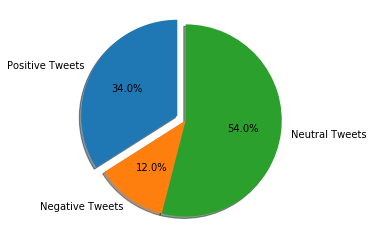

In [58]:
labels = 'Positive Tweets','Negative Tweets','Neutral Tweets'
sizes = [round(percentage_positive),round(percentage_negative),round(percentage_neutral)]
explodes = (0.1,0,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

# World Cloud

In [40]:
str1 = ' '.join(test)

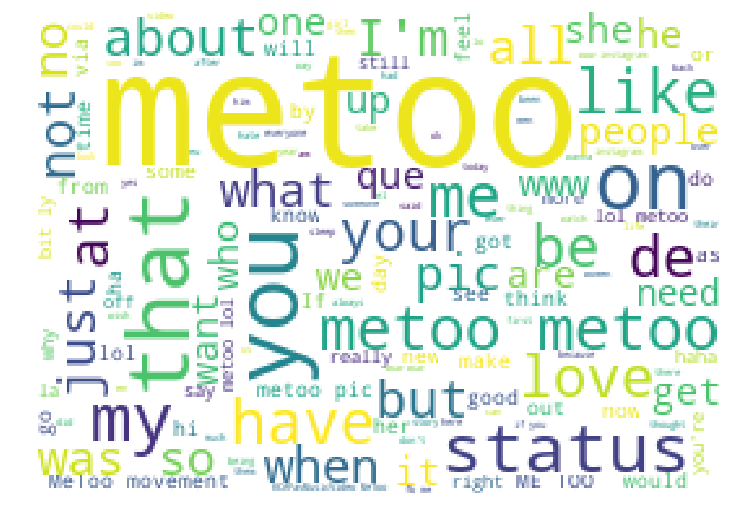

In [57]:
from PIL import Image
import urllib
import requests

stopwords = ['https','http','co','com','this','to','it','they','for','with','how','and','of','the','in','an','is','RT','twitter']
mask = np.array(Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCenGmMGvgjwcc7zXHLPsVyngefDerqRHYNnGK6NTo3Uj-BVmsNg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(stopwords, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=stopwords, mask=mask).generate(str1)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(stopwords, mask)

In [61]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [72]:
df['Date'] = pd.to_datetime(df.timestamp)
df.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['likes'] = df['likes'].resample('M').mean()
monthly_summary['replies'] = df['replies'].resample('M').mean()
monthly_summary['retweets'] = df['retweets'].resample('M').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Monthly Average likes, retweets, replies')